<a href="https://colab.research.google.com/github/Teyko1/Data-Science---Property-values/blob/main/Proyecto_ML_Coderhouse_Tealdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Modelo de ML para prediccion de precio en mercado inmobiliario. 


## **Problema**

Valuar las propiedades es un proceso difícil y, a veces, subjetivo. Para ello, proponemos crear un modelo de Machine Learning que, dadas ciertas características de la propiedad habitacional, prediga su precio de venta en USD sobre los barrios de la Ciudad Autónoma de Buenos Aires, Argentina.

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).



# **Integrantes**:
  - Mateo Tealdi
  - Pablo Bergolo
  - Pablo Honnorat

# 1. Características a utilizar

### ¿Qué datos nos ayudarían a trabajar en el problema?¿Por qué?

1. Los datos utiles que nos ayudarían a tasar las propiedades prodian ser: 
      - Ubicacion (Separadas en las 15 comunas de CABA)
      - Tipos de propiedad (Separada en 3 categorias unicamente Casas, Departamentos y PHs)
      - Ambientes
      - Habitaciones
      - Baños
      - Superficie del inmueble (superfice construida y superfice disponible)
 
El objetivo de este proyecto es crear un modelo de machine learning que permite facilitar el proceso de valuación de propiedades, es decir el **precio**; con una mirada mas objetiva de la información que se posee de las mismas y no con la subjetividad que se maneja el mercado argentino.

Tanto en cuanto espacio ocupa, en que barrio se ubica y que tipo de inmuebles permiten al consumidor determinar un valor de la propiedad.

Al mismo tiempo estableceremos parámetros base que nos ayudarán a centrar los valores y no tener diferencias que nos desequilibren el modelo.

Estaremos prediciendo entonces:
  - Operaciones de Venta 
  - Expresadas en Dólares (USD)
  - Unicamente en Argentina
  - Sobre los barrios de la Capital Federal.

### 2. Análisis Exploratorio de Datos

En esta sección realizaremos un Análisis Exploratorio de Datos (EDA) sobre el dataset de propiedades de Properati.

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cuáles serán los mejores predictores de la variable de interés?


**Comentarios del Dataset**

Para todo ello se realiza un analisis previo para aclarar que variables pueden influir sobre el valor de una propiedad y nos encontramos con que estas estan dadas principalmente por la cantidad de ambientes que posee la misma, superficie (total y cubierta), cantidad de habitaciones, la ubicación y el tipo de propiedad en cuestion.

El proceso de data acqusition se realizo sobre el dataset de properati la cual es una plataforma de compra y venta de propiedades que busca hacer de enlace entre compradores y vendedores del mercado inmobiliario.

0. Importamos las librerías necesarias para trabajar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1. Cargamos el dataset usando las funcionalidades de Pandas. Luego verificamos cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Properati Coderhouse Proyecto/ar_properties.csv")
df = pd.DataFrame(data = df)

Mounted at /content/drive


In [ ]:
df.head()

id    ad_type  start_date    end_date  created_on  \
0  DyVXfkpKygVBKuUk5olH+A==  Propiedad  2020-08-22  2020-09-03  2020-08-22   
1  9naojilaMecJN4jlQiTkGg==  Propiedad  2020-08-22  2020-09-04  2020-08-22   
2  tlCPRJPjoDEUzuuCelemAQ==  Propiedad  2020-08-22  2020-08-31  2020-08-22   
3  Zw3b91glQUO3HNrM5fPYlQ==  Propiedad  2020-08-22  2020-09-04  2020-08-22   
4  bsU81gm9JEgtZCbTYgvykg==  Propiedad  2020-08-22  2020-09-04  2020-08-22   

         lat        lon         l1                            l2  \
0 -34.407468 -58.957367  Argentina      Bs.As. G.B.A. Zona Norte   
1 -37.996039 -57.542509  Argentina  Buenos Aires Costa Atlántica   
2 -31.380187 -58.009182  Argentina                    Entre Ríos   
3 -27.494106 -55.123455  Argentina                      Misiones   
4 -32.948856 -60.630464  Argentina                      Santa Fe   

              l3  ... bathrooms surface_total  surface_covered  price  \
0          Pilar  ...       NaN      133139.0              NaN    NaN   
1  Mar del Plata  ...       NaN         687.0            687.0    NaN   
2      Concordia  ...       1.0          80.0             80.0    NaN   
3          Oberá  ...       1.0           NaN              NaN    NaN   
4        Rosario  ...       1.0          76.0             66.0    NaN   

   currency  price_period                                              title  \
0       NaN       Mensual  VENTA - Lote Industrial 130.000m2 - Parque Ind...   
1       NaN       Mensual                               Casa - Santa Cecilia   
2       NaN       Mensual                                   Casa - Concordia   
3       NaN       Mensual                                    Terreno - Obera   
4       NaN       Mensual                             Departamento - Rosario   

                                         description  property_type  \
0  Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...           Lote   
1  Conjunto edilicio de casa y departamentos en b...           Otro   
2  Casa de un dormitorio, cocina, baño, living co...           Casa   
3  IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...           Lote   
4  PORTAL DE LOS MARINOS<br>Es un complejo de viv...   Departamento   

  operation_type  
0          Venta  
1          Venta  
2       Alquiler  
3          Venta  
4          Venta  

[5 rows x 25 columns]

Dentro de las variables que pueden observarse en el dataset podemos determinar que las principales a utilizar en el analisis son l1(Pais), l2(Provincia), l3(Ciudad), bathrooms(Baños), rooms(Ambientes), bedrooms(Habitaciones), surface_total(Superficie total), surface_covered(Superficie cubierta), property_type(Tipo de propiedad), operation_type(Tipo de operación), currency(Moneda) y la variable target price(Precio)

In [ ]:
df.shape

(1000000, 25)

**El dataset tiene 1000000 filas y 25 columnas**

Realizamos un filtrado de los datos para enfocarnos en las operaciones de venta en dolares de las propiedades que se encuentran en Capital federal menores a  USD 4.000.000, con superficies mayores a  15 mts2 y menores a 1000 mts2 para evitar valores extremos. Nos enfocaremos para el análisis en propiedades como departamentos, PH y Casas.


In [ ]:
#Filtrado de datos
df2 = df[df.operation_type =="Venta"]
df3 = df2[df2.currency == "USD"]
df4 = df3[df3.l1 == "Argentina"]
df5 = df4[df4.l2 == "Capital Federal"]
df5 = df5[df5["property_type"].str.contains("Lote") == False]
df5 = df5[df5["property_type"].str.contains("Cochera") == False]
df5 = df5[df5["property_type"].str.contains("Oficina") == False]
df5 = df5[df5["property_type"].str.contains("Local comercial") == False]
df5 = df5[df5["property_type"].str.contains("Otro") == False]
df5 = df5[df5["property_type"].str.contains("Depósito") == False]
df5 = df5[df5["property_type"].str.contains("Casa de campo") == False]
df5 = df5[(df5.price <= 4000000)] 
df5 = df5[df5.surface_total>= 15]
df5 = df5[df5.surface_total <= 1000]

In [ ]:
#Eliminacion de columnas con informacion no necesaria para el analisis
df6 = df5.drop(columns=['created_on','l1','currency','operation_type','l2','l5', 'l6','l4','lat','lon', 'price_period', 'description', 'title', 'id','ad_type', 'start_date', 'end_date'])

2. Transformación de los datos
  - Analisis de valores nulos y su imputación
  - Detección de outliers y procesamiento
 

In [ ]:
#Analisis de datos nulos del nuevo dataset
df6.isnull().sum()

l3                   702
rooms               3627
bedrooms           18527
bathrooms           1747
surface_total          0
surface_covered     2892
price                  0
property_type          0
dtype: int64

El porcentaje de valores perdidos supera el 5% por lo cual no concideramos correcto reemplazarlos por la media, moda o mediana ya que esta distorsionaria el analisis estadistico, lo correcto seria utilizar un modelo de imputación hot-deck o multiple pero por cuestiones academicas se procedera a eliminar los valores nulos

In [ ]:
#Eliminacion de datos nulos
df7 = df6.dropna()

In [ ]:
#Verificamos nuevamente los valores nulos
df7.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [ ]:
df7.shape

(80418, 8)

**El nuevo dataset tiene 80418 filas y 8 columnas**

3. **Analizamos ahora las relaciones entre las variables**: ¿Cuántas Habitaciones hay por propiedad hay en este dataset?¿Cuántos ambientes hay por cada propiedad? Usando las funcionalidades de Pandas y con un gráficos apropiados se analizarán cada una de ellas.

<Figure size 720x360 with 0 Axes>

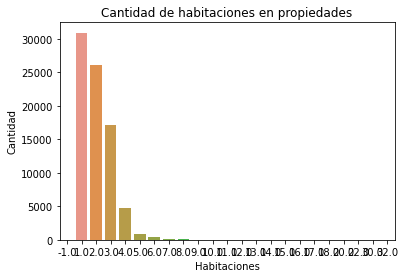

In [ ]:
#Sumatoria de cantidad de habitaciones por propiedad
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
p = sns.countplot(x = "bedrooms", data =df7).set(title="Cantidad de habitaciones en propiedades")
ax.set(xlabel ="Habitaciones", ylabel = "Cantidad")
plt.show()

Podemos observar en el grafico anterior que la gran mayoria de las propiedades del dataset poseen 1 o 2 habitaciones normalmente.

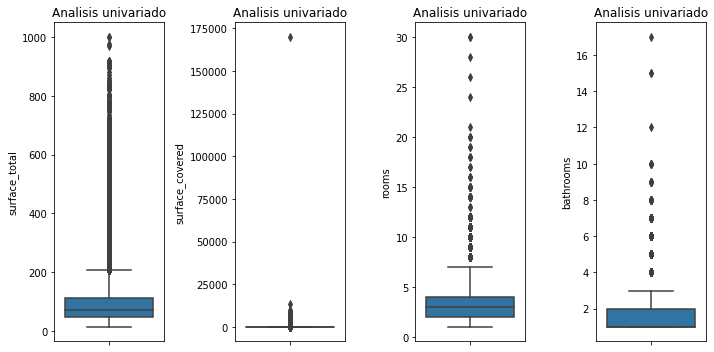

In [ ]:
#Grafico de boxplot para analisis de variables 
variables = ["surface_total", "surface_covered", "rooms", "bathrooms"]

fig, axes = plt.subplots(1, len(variables), figsize=(10,5))


for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df7, ax=ax)
    ax.set_title('Analisis univariado')
plt.tight_layout()
plt.show()


En el caso del boxplot de la superficie total y cubierta lo recomendable seria la eliminación de outliers para un análisis correcto de la variable.
Podemos observar que los valores minimos a la cantidad de baños es de uno al igual que la cantidad de ambientes. Bajo la misma logica es conveniente la eliminación de outliers para un mejor análisis

No handles with labels found to put in legend.


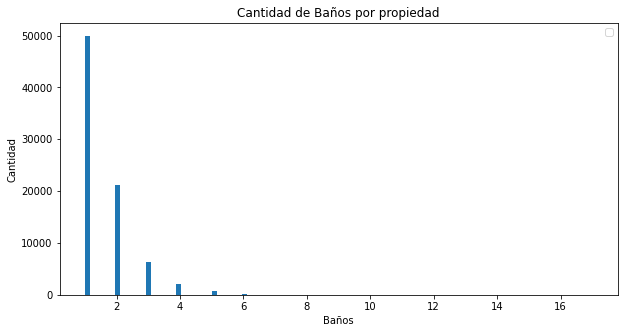

In [ ]:
#Grafico de barras para analisis de variables
df_visual = df7["bathrooms"]
df_visual.values
df_visual.values.flatten()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_visual.values.flatten(), bins=100)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
ax.set_title('Cantidad de Baños por propiedad')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Baños')
ax.legend()
plt.show()

Podemos observar que la mayoria de las porpiedades poseen 1 o 2 baños

---



No handles with labels found to put in legend.


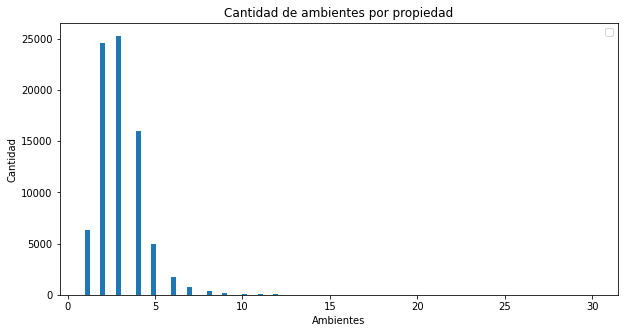

In [ ]:
#Grafico para analisis de variables
df_visual = df7["rooms"]
df_visual.values
df_visual.values.flatten()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_visual.values.flatten(), bins=100)


ax.set_title('Cantidad de ambientes por propiedad')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Ambientes')
ax.legend()
plt.show()

Puede apreciarse que la mayoria de las propiedades poseen 2 o 3 ambientes en su distribución.

No handles with labels found to put in legend.


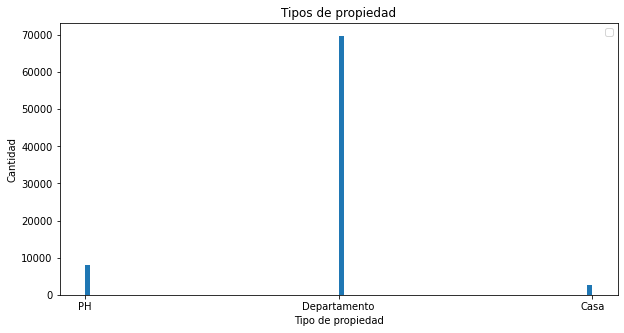

In [ ]:
df_visual = df7["property_type"]
df_visual.values

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_visual.values.flatten(), bins=100)
ax.set_title('Tipos de propiedad')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Tipo de propiedad')
ax.legend()
plt.show()

Al encontrar gran cantidad de outliers se decide su eliminación para no distorsionar el análisis del dataframe

In [ ]:
def eliminacion_outliers(df7):
    Q1=df7.quantile(0.25)
    Q3=df7.quantile(0.75)
    IQR=Q3-Q1

    df7 = df7[~((df7 < (Q1 - 1.5 * IQR)) |(df7 > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df7

In [ ]:
df7 = eliminacion_outliers(df7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


Vista de los graficos realizados anteriormente sin outliers

<Figure size 720x360 with 0 Axes>

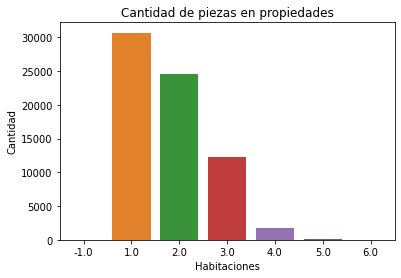

In [ ]:
#Sumatoria de cantidad de piezas por propiedad
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
p = sns.countplot(x = "bedrooms", data =df7).set(title="Cantidad de piezas en propiedades")
ax.set(xlabel ="Habitaciones", ylabel = "Cantidad")
plt.show()

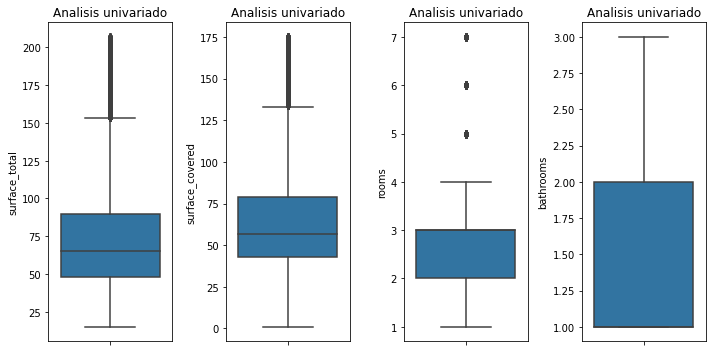

In [ ]:
#Grafico de boxplot para analisis de variables removiendo outliers
variables = ["surface_total", "surface_covered", "rooms", "bathrooms"]

fig, axes = plt.subplots(1, len(variables), figsize=(10,5))


for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df7, ax=ax)
    ax.set_title('Analisis univariado')
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


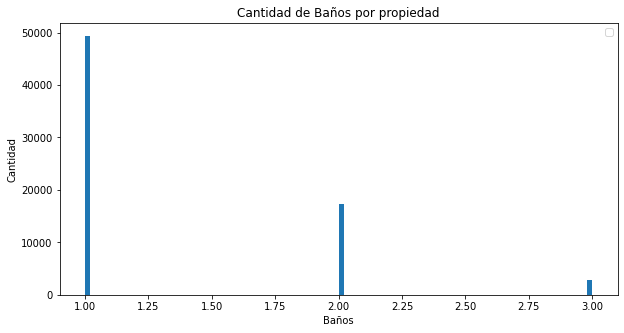

In [ ]:
#Grafico de barras para analisis de variables
df_visual = df7["bathrooms"]
df_visual.values
df_visual.values.flatten()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_visual.values.flatten(), bins=100)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
ax.set_title('Cantidad de Baños por propiedad')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Baños')
ax.legend()
plt.show()

No handles with labels found to put in legend.


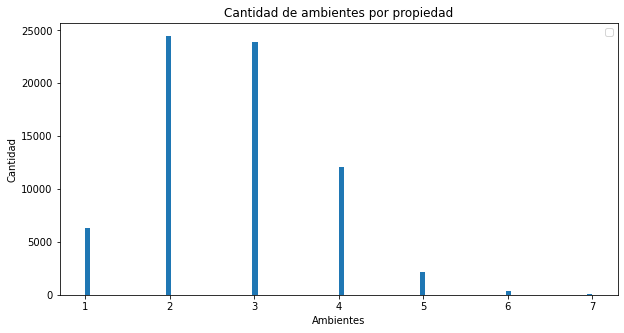

In [ ]:
#Grafico para analisis de variables
df_visual = df7["rooms"]
df_visual.values
df_visual.values.flatten()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_visual.values.flatten(), bins=100)


ax.set_title('Cantidad de ambientes por propiedad')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Ambientes')
ax.legend()
plt.show()

Analisis bivariado

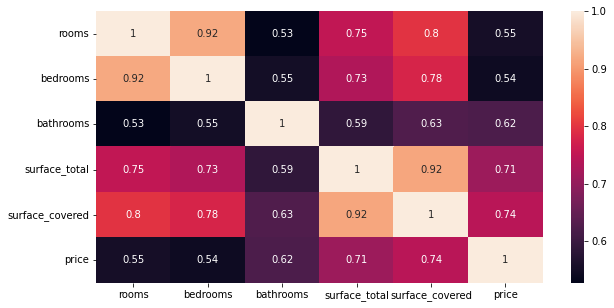

In [ ]:
#matriz de coorelacion entre variables
corrMatrix = df7.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Se puede observar una gran coorrelación positiva entre las variables dado principalmente por la superficie total y cubierta con respecto al precio y la cantidad de ambientes de una propiedad.

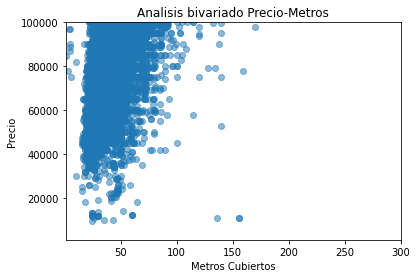

In [ ]:
#Grafico de dispersion para analisis bivariado
plt.scatter(x = "surface_covered", y = "price", data = df7, alpha=0.5)
sns.set(rc = {'figure.figsize':(10,5)})
plt.xlim(1, 300)
plt.ylim(1000, 100000)
plt.title('Analisis bivariado Precio-Metros')
plt.xlabel('Metros Cubiertos')
plt.ylabel('Precio')
plt.show()

Como se remarco anteriormente las correlaciones positivas entre las variables, en este caso puede verse diagramada la coorrelación entre el precio y la cantidad de metros cubiertos de la propiedad.

In [ ]:
#Grafico de torta con la sumatoria de los precios separados por tipo de propiedad
plt.figure(figsize=(10,5))
fig = px.pie(df6, names="property_type",values='price',hole=0.4, title="Sumatoria de valores de las propiedades separadas por tipo")
fig.show()
plt.show()

<Figure size 720x360 with 0 Axes>

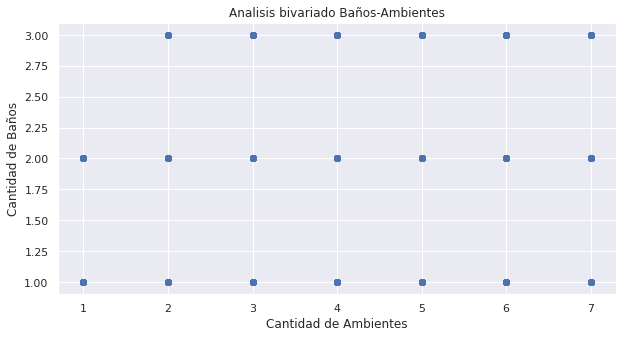

In [ ]:
plt.scatter(x = "rooms", y = "bathrooms", data = df7, alpha=0.5)
sns.set(rc = {'figure.figsize':(10,5)})

plt.title('Analisis bivariado Baños-Ambientes')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Cantidad de Baños')
plt.show()

La cantidad de ambientes no tiene una coorrelación muy marcada con la cantidad de baños.

Transformacion de variables categoricas en numericas

In [ ]:
#Transformacion de variable categorica en numerica
pd.value_counts(df7["property_type"])
df7["property_type"]. replace(["Departamento", "Casa", "Lote", "PH", "Local comercial", "Otro", "Oficina", "Cochera", "Depósito", "Casa de campo"], [0,1,2,3,4,5,6,7,8,9], inplace = True)

In [ ]:
#Transformacion de variable categorica en numerica

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df7["l3"])
df7.drop("l3", axis=1, inplace=True)
df7["Localidades"] = label
df7

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
185       2.0       1.0        1.0           41.0             41.0   61000.0   
186       2.0       1.0        1.0           50.0             41.0  109900.0   
193       2.0       1.0        1.0           47.0             40.0  109000.0   
198       2.0       1.0        1.0           47.0             40.0  109000.0   
199       2.0       1.0        1.0           83.0             42.0  142000.0   
...       ...       ...        ...            ...              ...       ...   
999790    5.0       4.0        2.0          106.0             90.0   99000.0   
999791    4.0       4.0        1.0           85.0             75.0  160000.0   
999918    5.0       4.0        3.0          150.0            141.0  365000.0   
999925    6.0       4.0        1.0           95.0             95.0  109000.0   
999932    5.0       4.0        1.0          110.0             95.0  318000.0   

        property_type  Localidades  
185                 3           17  
186                 3           55  
193                 0           25  
198                 0            2  
199                 0           13  
...               ...          ...  
999790              3           33  
999791              3            9  
999918              0           26  
999925              0           15  
999932              0            5  

[69443 rows x 8 columns]

Selección de variables del dataset final que van a ser de aplicabilidad al modelo

In [ ]:
df8 = df7[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type", "Localidades"]]
df8

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
185       2.0       1.0        1.0           41.0             41.0   61000.0   
186       2.0       1.0        1.0           50.0             41.0  109900.0   
193       2.0       1.0        1.0           47.0             40.0  109000.0   
198       2.0       1.0        1.0           47.0             40.0  109000.0   
199       2.0       1.0        1.0           83.0             42.0  142000.0   
...       ...       ...        ...            ...              ...       ...   
999790    5.0       4.0        2.0          106.0             90.0   99000.0   
999791    4.0       4.0        1.0           85.0             75.0  160000.0   
999918    5.0       4.0        3.0          150.0            141.0  365000.0   
999925    6.0       4.0        1.0           95.0             95.0  109000.0   
999932    5.0       4.0        1.0          110.0             95.0  318000.0   

        property_type  Localidades  
185                 3           17  
186                 3           55  
193                 0           25  
198                 0            2  
199                 0           13  
...               ...          ...  
999790              3           33  
999791              3            9  
999918              0           26  
999925              0           15  
999932              0            5  

[69443 rows x 8 columns]

In [ ]:
#Analisis Multivariado con diagrama de dispersion analizando el precio y la superficie total detallando tipo de propiedades
plt.figure(figsize=(10,5))
fig = px.scatter(df7, x='surface_total',y='price',color='property_type',title="Analisis de coorrelacion entre precio y superficie total discriminado por tipo de propiedad")
fig.show()
plt.show()

<Figure size 720x360 with 0 Axes>

In [ ]:
#Analisis Multivariado con diagrama de dispersion analizando el precio y la superficie cubierta detallando tipo de propiedades
plt.figure(figsize=(10,5))
fig = px.scatter(df7, x='surface_covered',y='price',color='property_type',title="Analisis de coorrelacion entre precio y superficie cubierta discriminado por tipo de propiedad")
fig.show()
plt.show()

<Figure size 720x360 with 0 Axes>

## **Desarrollo de modelos de machine learning**

In [ ]:
#Separación de la variable target del dataset
X = df8.drop('price',axis=1)
Y = df8.price   #Target


In [ ]:
#Separamos los datos en test y train
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=42) 

In [ ]:
#Se normalizan los valores de las variables bajo análisis
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

Reducción de dimensionalidad:PCA

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
# Creamos el objeto PCA con 5 variables
pca=PCA(n_components=7)
X_train_pca=pca.fit_transform(X_train_sc)
X_test_pca=pca.transform(X_test_sc)

## Realización de modelo de Machine Learning RandomForestRegressor

In [ ]:
#Importación de libreria
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Creación del RandomForest
model_random_forest = RandomForestRegressor(random_state=42, max_depth= 5)

In [ ]:
#Entrenamiento del modelo
model_random_forest.fit(X_train_sc, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [ ]:
#Predicción sobre el conjunto de test y train
y_train_model_random_forest=model_random_forest.predict(X_train_sc)
y_test_model_random_forest=model_random_forest.predict(X_test_sc)

In [ ]:
#Medición de los resultados del modelo
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_model_random_forest))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_model_random_forest))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_model_random_forest)))
mape = np.mean(np.abs((y_test - y_test_model_random_forest) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 40260.43330416092
Mean Squared Error (MSE): 3171874074.816149
Root Mean Squared Error (RMSE): 56319.39341662115
Mean Absolute Percentage Error (MAPE): 24.83
Accuracy: 75.17


Validación cruzada del Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
validacion_cruzada= cross_val_score(model_random_forest, X,Y, cv=5) 

In [ ]:
print(validacion_cruzada)

[0.65698519 0.64622725 0.67186449 0.65866177 0.66586826]


In [ ]:
#Curva de validación
from sklearn.metrics import r2_score 
scores_train = []
scores_test = []
N_estimadores = np.arange(1,50)
for n_estimadores in N_estimadores:
    regr=RandomForestRegressor(n_estimators=n_estimadores)
    regr.fit(X_train_sc, y_train)
    
    y_pred_train_regr_2 = regr.predict(X_train_sc)
    y_pred_test_regr_2 = regr.predict(X_test_sc)
    
    scores_train.append(r2_score(y_train, y_pred_train_regr_2))
    scores_test.append(r2_score(y_test, y_pred_test_regr_2))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

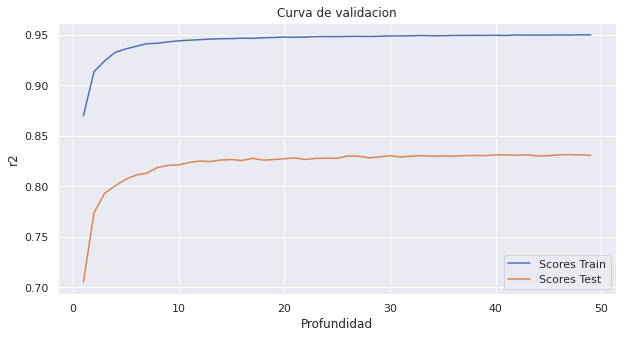

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(N_estimadores,scores_train, label = 'Scores Train')
plt.plot(N_estimadores,scores_test, label = 'Scores Test')
plt.title('Curva de validacion')
plt.legend()
plt.ylabel('r2')
plt.xlabel('Profundidad')
plt.show()


En la curva de validacion se observa que el modelo tiene una varianza muy alta, Antes de realizar la optimización de hiperparametros podemos decir que este modelo no seria el ideal para predecir en este problema

Analisis del modelo aplicando PCA

In [ ]:
#Predicción sobre el conjunto de test y train
y_train_model_random_forest=model_random_forest.predict(X_train_pca)
y_test_model_random_forest_PCA=model_random_forest.predict(X_test_pca)

In [ ]:
#Medición de los resultados del modelo
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_model_random_forest_PCA))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_model_random_forest_PCA))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_model_random_forest_PCA)))
mape = np.mean(np.abs((y_test - y_test_model_random_forest_PCA) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 91384.52913001276
Mean Squared Error (MSE): 12561024560.76209
Root Mean Squared Error (RMSE): 112075.9767334735
Mean Absolute Percentage Error (MAPE): 64.19
Accuracy: 35.81


Como puede observarse el hecho de aplicar una reducción de componentes de analisis no mejora el resultado, todo lo contrario por lo cual no es conveniente de aplicar a los modelos

### Optimización de Hiperparametros

In [ ]:
regr_op=RandomForestRegressor()

param_grid={ 
            'bootstrap':[True],
            'max_depth':[80,90,100,110], 
            'n_estimators':[10,20,30,40,50]
            }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
CV= RandomizedSearchCV(regr_op,param_grid,cv=5) 
CV.fit(X_train_sc, y_train) 

print(CV.best_score_)
print(CV.best_params_)

0.8205663229896031
{'n_estimators': 50, 'max_depth': 90, 'bootstrap': True}


In [ ]:
y_test_model_random_forest_Optimizado=CV.predict(X_test_sc)

In [ ]:
#Medición de los resultados del modelo Optimizado

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_model_random_forest_Optimizado))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_model_random_forest_Optimizado))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_model_random_forest_Optimizado)))
mape = np.mean(np.abs((y_test - y_test_model_random_forest_Optimizado) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 26165.845130178164
Mean Squared Error (MSE): 1591074401.0127141
Root Mean Squared Error (RMSE): 39888.273978861434
Mean Absolute Percentage Error (MAPE): 15.93
Accuracy: 84.07


Se puede observar una importante mejora en el nivel de predicción del modelo en especial al observar la disminución del RMSE que pasa de 56319 a 39771

## Realización de modelo de Machine Learning Arbol de decision regresion

In [ ]:
#Importación de libreria
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Creación del Arbol de decision
model_tree_regressor = DecisionTreeRegressor( random_state = 42, max_depth = 5)

In [ ]:
#Entrenamiento del modelo
model_tree_regressor.fit(X_train_sc, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
#Predicción sobre el conjunto de test y train
y_train_model_tree=model_tree_regressor.predict(X_train_sc)
y_test_model_tree=model_tree_regressor.predict(X_test_sc)

In [ ]:
#Medición de los resultados del modelo
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_model_tree))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_model_tree))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_model_tree)))
mape = np.mean(np.abs((y_test - y_test_model_tree) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 41460.058192709774
Mean Squared Error (MSE): 3346939025.407146
Root Mean Squared Error (RMSE): 57852.73567781515
Mean Absolute Percentage Error (MAPE): 25.49
Accuracy: 74.51


### Optimización de Hiperparametros

In [ ]:
max_depths=np.arange(1,15)

for n in max_depths:
    
    tree_regressor_optimizado = DecisionTreeRegressor(max_depth=n)
    
    tree_regressor_optimizado.fit(X_train_sc,y_train)
    

    y_train_pred = tree_regressor_optimizado.predict(X_train_sc)
    train_error_cuadratico_medio=metrics.mean_squared_error(y_train, y_train_pred, squared=False)
    
    y_test_pred = tree_regressor_optimizado.predict(X_test_sc)
    test_error_cuadratico_medio=metrics.mean_squared_error(y_test, y_test_pred, squared= False)
    print("RMSE "+ str(n)+ " " + str(test_error_cuadratico_medio))


RMSE 1 74516.81546336318
RMSE 2 66278.30058483467
RMSE 3 61464.96491888792
RMSE 4 59723.75363575067
RMSE 5 57852.73567781515
RMSE 6 55759.20388423426
RMSE 7 53715.37429381119
RMSE 8 51807.95064485061
RMSE 9 49938.92695191394
RMSE 10 48163.88151195795
RMSE 11 46946.4740997094
RMSE 12 46164.65846968248
RMSE 13 45595.94003020742
RMSE 14 45578.14522075516


Podemos observar que con una profundidad de 14 en el arbol se obtiene el menor RMSE ya con el hiperparametro optimizado. Para valores mayores ya se empieza a generar un overfitting.

## Realización de modelo de Machine Learning KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
n_neighbors=5
regresion_knn =KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')

In [ ]:
#Entrenamiento del modelo
regresion_knn.fit(X_train_sc,y_train)

KNeighborsRegressor()

In [ ]:
#Predicción sobre el conjunto de test y train
y_train_knn=regresion_knn.predict(X_train_sc)
y_test_knn=regresion_knn.predict(X_test_sc)

In [ ]:
#@title
#Medición de los resultados del modelo
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_knn))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_knn))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_knn)))
mape = np.mean(np.abs((y_test - y_test_knn) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))


Mean Absolute Error (MAE): 31752.848221571545
Mean Squared Error (MSE): 2239295681.38209
Root Mean Squared Error (RMSE): 47321.196956354455
Mean Absolute Percentage Error (MAPE): 19.16
Accuracy: 80.84


### Optimización de hiperparametros

In [ ]:
# Definimos la lista de valores de k 
k_vecinos = [1,2,3,4,5,6,7,8,9,10]

 
for k in k_vecinos:
    
    knn_regressor_optimizado = KNeighborsRegressor(n_neighbors=k)
    
    knn_regressor_optimizado.fit(X_train_sc,y_train)
    
    y_train_pred_optimizado = knn_regressor_optimizado.predict(X_train_sc)
    train_error_cuadratico_medio=metrics.mean_squared_error(y_train, y_train_pred_optimizado, squared=False)
    
    y_test_pred_optimizado = knn_regressor_optimizado.predict(X_test_sc)
    test_error_cuadratico_medio=metrics.mean_squared_error(y_test, y_test_pred_optimizado, squared= False)
    print("RMSE "+ str(k)+ " " + str(test_error_cuadratico_medio))
    

RMSE 1 54075.65323966819
RMSE 2 48896.40190844833
RMSE 3 47796.375728716026
RMSE 4 47424.91943655577
RMSE 5 47321.196956354455
RMSE 6 47303.10172675855
RMSE 7 47360.530753592684
RMSE 8 47490.65032118966
RMSE 9 47446.17682012229
RMSE 10 47522.8308527038


Podemos observar que el menor RMSE esta dado por un k=6 pero de todas formas este no es el mejor modelo a utilizar para poder predecir el precio de la variable precio de acuerdo a los valores encontrados

## Xgboost

:Se crea un modelo de emsamble Xgboost para mejorar la capacidad de prediccion de la variable target


In [ ]:
#Importación de la libreria
from xgboost import XGBRegressor

In [ ]:
#Creamos el modelo
Regresion_XGB=XGBRegressor() 

Regresion_XGB.fit(X_train_sc,y_train)

[00:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Predicción
y_train_pred_Regresion_XGB=Regresion_XGB.predict(X_train_sc)
y_test_pred_Regresion_XGB=Regresion_XGB.predict(X_test_sc)

In [ ]:
#Medición de los resultados del modelo

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_pred_Regresion_XGB))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred_Regresion_XGB))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_Regresion_XGB)))
mape = np.mean(np.abs((y_test - y_test_pred_Regresion_XGB) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 33078.91959177597
Mean Squared Error (MSE): 2141754300.5528252
Root Mean Squared Error (RMSE): 46279.0913972263
Mean Absolute Percentage Error (MAPE): 20.07
Accuracy: 79.93


Validación cruzada del XGboost

In [ ]:
#Se utiliza para la mejorar manera la precision del modelo, se presenta los resultados de los 5 estimadores
xgb_score= cross_val_score(Regresion_XGB, X, Y, cv=5,scoring='r2')
print(xgb_score)

[00:10:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.76142066 0.76904082 0.77646266 0.7697572  0.77103349]


Curva de validación

In [ ]:
scores_train = []
scores_test = []
N_estimadores = np.arange(1,50)
for n_estimadores in N_estimadores:
    xgb_regr=XGBRegressor(max_depth=n_estimadores)
    xgb_regr.fit(X_train_sc, y_train)
    
    y_pred_train_regr_3 = xgb_regr.predict(X_train_sc)
    y_pred_test_regr_3 = xgb_regr.predict(X_test_sc)
    
    scores_train.append(r2_score(y_train, y_pred_train_regr_3))
    scores_test.append(r2_score(y_test, y_pred_test_regr_3))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

[00:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

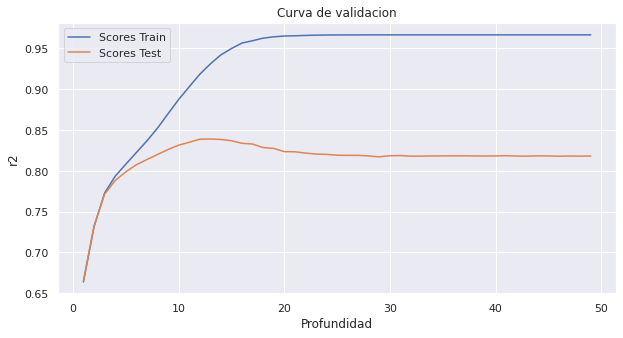

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(N_estimadores,scores_train, label = 'Scores Train')
plt.plot(N_estimadores,scores_test, label = 'Scores Test')
plt.title('Curva de validacion')
plt.legend()
plt.ylabel('r2')
plt.xlabel('Profundidad')
plt.show()

### Optimización de Hiperparametros XGboost

Se eligen hiperparametros para reducir el costo computacional y evitar demoras en su procesamiento

In [ ]:
Regresion_XGB_op=XGBRegressor() 
parametros={'learnig_rate':[0.01,0.1],
             'max_depth':[5,10,15,30,45],
             'n_estimators':[10,20,30,40,50]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
CV= RandomizedSearchCV(Regresion_XGB_op,parametros,cv=5) 
CV.fit(X_train_sc, y_train) 

print(CV.best_score_)
print(CV.best_params_)

[00:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
y_test_model_XGBoost_Optimizado=CV.predict(X_test_sc)

In [ ]:
#Medición de los resultados del modelo Optimizado

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_model_XGBoost_Optimizado))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_model_XGBoost_Optimizado))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_model_XGBoost_Optimizado)))
mape = np.mean(np.abs((y_test - y_test_model_XGBoost_Optimizado) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 26206.6687092931
Mean Squared Error (MSE): 1540692427.4330068
Root Mean Squared Error (RMSE): 39251.655091639215
Mean Absolute Percentage Error (MAPE): 15.68
Accuracy: 84.32


## Analisis comparativos de los modelos

A continuación presentamos un cuadro resumen con los datos obtenidos de los modelos utilizados:

In [ ]:
resumen =pd.DataFrame ({"Modelo":["RandomForestRegressor", "Árbol de decisión", "Vecinos más cercanos", "XGBoost"], 
           "Hiper-parámetros":["profundidad máxima = 100" , "profundidad máxima = 14", "número de vecinos = 6", "profundidad máxima = 10"], "RMSE (test)":["39771", "45580", "47303", "40577"]})
pd.DataFrame(resumen)   

Modelo          Hiper-parámetros RMSE (test)
0  RandomForestRegressor  profundidad máxima = 100       39771
1      Árbol de decisión   profundidad máxima = 14       45580
2   Vecinos más cercanos     número de vecinos = 6       47303
3                XGBoost   profundidad máxima = 10       40577

Por lo que podemos observar a simple vista el modelo que mejor predice los resultados es el RandomForestRegressor con un RMSE de 39771. Cabe destacar que al optimizar los hiperparametros y tomar una profundidad de 100 posiblemente estariamos generando un underfitting por lo cual lo mas recomendable seria utilizar el modelo XGBoost con un RMSE de 40577.

Si bien para este proyecto busco acotarse el análisis realizado para obtener resultados mas precisos en cuanto a las predicciones podemos destacar la posibilidad de otro tipo de modificaciones al proyecto que en cierta forma mejorarian la capacidad explicativa del modelo como por ejemplo acotarlo a solo un tipo de propiedad ya sea casa, PH o Departamento y no las 3 al mismo tiempo. 
A su vez, si bien se eligio Capital Federal como la ubicación a analizar esta tambien es muy extensa por lo cual consideramos que en lo posible lograr hacer una subdivision por sectores de la misma seria lo mas conveniente.

Tambien el rango de precios utilizados consideramos que podria acotarse y en cierta forma evitar algunas distorsiones que pueda llegar a generar a los fines practicos.
